<a href="https://colab.research.google.com/github/jakewalter/intro_seismology/blob/main/earthquake_moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is will be useful for Problem 2 from the text


In [ ]:
import numpy as np

m = np.array([[-1.8, -0.38, -0.96],
              [-0.38, -1.9, 0.62],
              [-0.96, 0.62, 3.7]])

m0 = (1/np.sqrt(2)) * np.sqrt(np.sum(np.sum(m * m))) * 1e17

mw =

N, mr = np.linalg.eig(m)

mp = np.diag([mr[2, 2], mr[1, 1], mr[0, 0]])

eps = mp[1, 1] / max(abs(mp[0, 0]), abs(mp[2, 2]))

a = (mp[0, 0] - mp[2, 2]) / 2
mdc = np.diag([a, 0, -a])

mclvd = mp - mdc

m0_dc = (1 / np.sqrt(2)) * np.sqrt(np.sum(np.sum(mdc * mdc))) * 1e17
m0_clvd = (1 / np.sqrt(2)) * np.sqrt(np.sum(np.sum(mclvd * mclvd))) * 1e17

clvd_m0_frac =


For problem 5 from the text, use this image

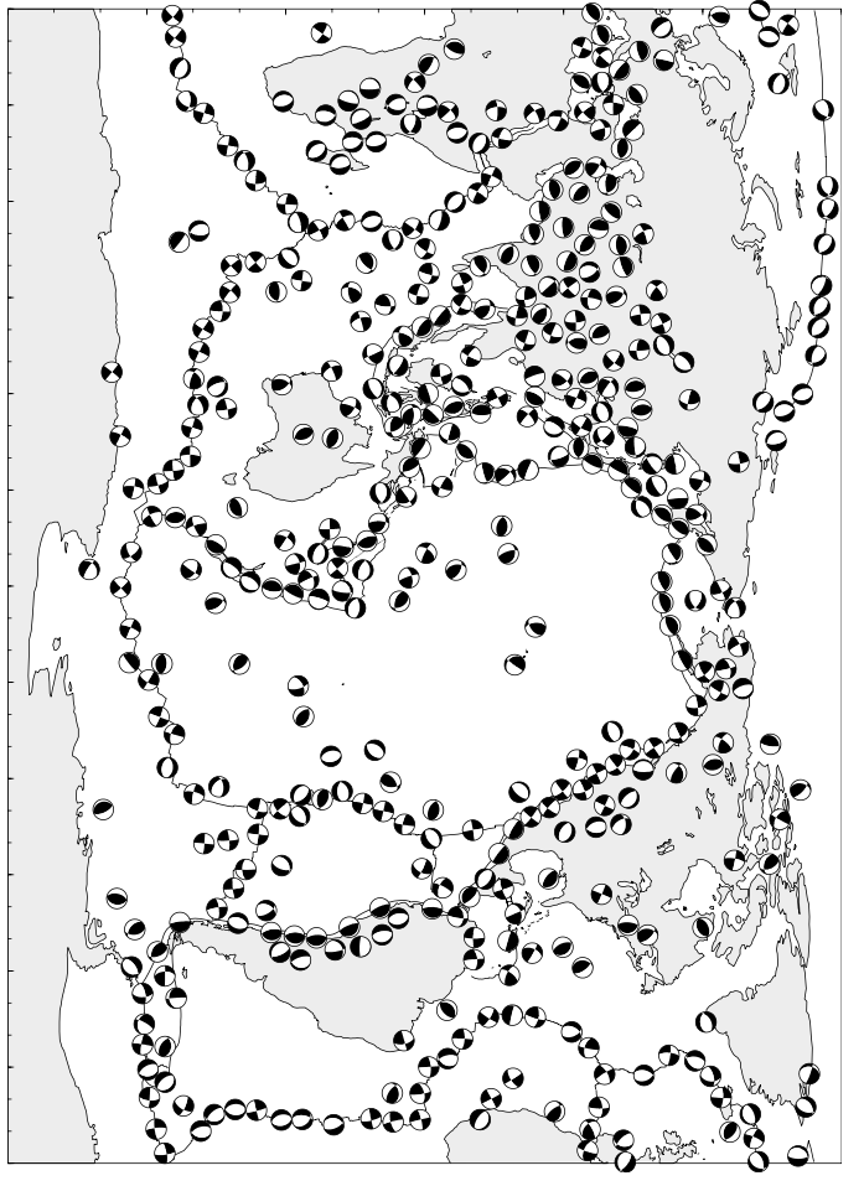

Now let's examine some earthquake catalogs. Download North America earthquakes and plot them. What magnitude threshold did we set by default for seismicity? What state is the most earthquake-active?


In [ ]:
!pip install obspy
!pip install cartopy
import pandas as pd
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import matplotlib.pyplot as plt  # plotting library
import cartopy.feature as cfeature

def catdf_cat(cat):

    times = []
    lats = []
    lons = []
    deps = []
    magnitudes = []
    magnitudestype = []
    resourceid = []


    for event in cat:
        if len(event.origins) != 0:
            origin1 = event.preferred_origin() or event.origins[0]
            times.append(origin1.time.datetime)
            lats.append(origin1.latitude)
            lons.append(origin1.longitude)
            deps.append(origin1.depth)
            resourceid.append(event.resource_id)

            if event.preferred_magnitude() is not None:
                magnitudes.append(event.preferred_magnitude().mag)
                magnitudestype.append(event.preferred_magnitude().magnitude_type)
            else:
                if len(event.magnitudes)>0:
                    magnitudes.append(event.magnitudes[0].mag)
                    magnitudestype.append(event.magnitudes[0].magnitude_type)
                else:
                    magnitudes.append(np.nan)
                    magnitudestype.append(np.nan)

    catdf1 = pd.DataFrame({'origintime':times,'latitude':lats,'longitude':lons, 'depth':deps,'magnitude':magnitudes,'type':magnitudestype,'id':resourceid})
    return catdf1

client = Client("USGS")

t1 = UTCDateTime("2000-01-01T00:00:00")
t2 = UTCDateTime("2024-04-09T00:00:00")

cat = client.get_events(starttime=t1, endtime=t2, minlatitude=5,maxlatitude=77, minlongitude=-178 ,maxlongitude=-45, minmagnitude=5)
catdf = catdf_cat(cat)

plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-178,-45, 5, 77], ccrs.PlateCarree())
ax.coastlines(); #ax.gridlines();
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.plot(catdf.longitude,catdf.latitude,'k.',transform=ccrs.PlateCarree())

Now examine the earthquake catalog for Oklahoma. Compare the observations of earthquakes to this figure: https://www.occeweb.com/og/Oklahoma%20Class%20II%20UIC%20Wells.jpg. What do you notice?


In [ ]:
import numpy as np
catdf = pd.read_csv('http://wichita.ogs.ou.edu/eq/catalog/complete/complete.csv')
catdf = catdf.reset_index(drop=True)
catdf['origintime'] = pd.to_datetime(catdf['origintime'])
catdf['magnitude'] = catdf['magnitude'].astype(str).replace("None", "0").astype(float)
catdf['magnitude'] = catdf['magnitude'].astype(float)
catdf.sort_values(by=['origintime'], inplace=True)
catdf = catdf.reset_index(drop=True)



plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-100,-94, 33, 37], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.coastlines(); #ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
ax.plot(catdf.longitude,catdf.latitude,'k.',transform=ccrs.PlateCarree())


Now change the plotting so that you scale the symbol by magnitude size (no need to make a legend here). Add an additional line at the bottom and use scatter instead of plot to adjust the size relative to the magnitude

In [ ]:

plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-100,-94, 33, 37], ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.coastlines(); #ax.gridlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');

Plot the frequency-magnitude distribution

In [ ]:
rangemin = np.floor(np.min(catdf['magnitude'].values[~np.isnan(catdf['magnitude'].values)]))
rangemax = np.ceil(np.max(catdf['magnitude'].values[~np.isnan(catdf['magnitude'].values)]))

hist, edges = np.histogram(a=catdf['magnitude'].values[~np.isnan(catdf['magnitude'].values)],bins=int(10*(rangemax-rangemin)+1), range=(rangemin,rangemax))
chist = np.cumsum(hist[::-1])[::-1]


fig, ax = plt.subplots()
ax.plot(edges[:-1], hist, marker='.', color='k', linestyle='')
ax.plot(edges[:-1], chist, marker='o', color='k', linestyle='',label='')



ax.set_yscale('log')
ax.set_ylabel('N')
ax.set_xlabel('Magnitude')
#    ax.set_xlim(1, 6)
#    ax.set_ylim(1e0, 4e4)
ax.set_title('Gutenburg-Richter Distribution')
plt.show()

What do you notice about this plot? There are many earthquakes with negative magnitudes, is that possible? Use your answer from the first code block and estimate the slip area for a M-1.0 earthquake. Assume that M is equivalent to Mw, the shear modulus is 30 GPa, and the tiny fault slipped 1 mm.

In [ ]:
#Calculate moment and then determine fault dimensions


Where do many of those negative magnitude events occur? Plot those up. How are these detected when the signal rapidly attenuates and competes with other sources of noise?

In [ ]:
catdf1 = catdf[catdf['magnitude']<0]

## copy code from above and plot where those negative magnitudes occur in the catalog


In [ ]:
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime
t = UTCDateTime("2024-04-01T00:00:00.000")
inv = client.get_stations(network="OK", station='*',starttime=t,endtime=t+60)
inv.extend(client.get_stations(network="O2", station='*',starttime=t,endtime=t+60))
inv.extend(client.get_stations(network="GM", station='*',starttime=t,endtime=t+60))

lat = []
lon = []
name = []
for net in inv:
    for sta in net:
        lat.append(sta.latitude)
        lon.append(sta.longitude)
        name.append(sta.code)
dfnow = pd.DataFrame(list(zip(name, lat, lon)),
               columns =['Name', 'lat', 'lon'])


### Now add this data point to your plots. The goal is to get a map with negative magnitude events and seismic stations